In [1]:
import seaborn as sns

In [2]:
iris=sns.load_dataset('iris')

In [3]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
x_iris=iris.drop('species',axis=1)
x_iris.shape

(150, 4)

In [8]:
y_iris = iris['species']
y_iris.shape

(150,)

In [10]:
import matplotlib.pyplot as plt 
import numpy as np

In [11]:
rng = np.random.RandomState(42)

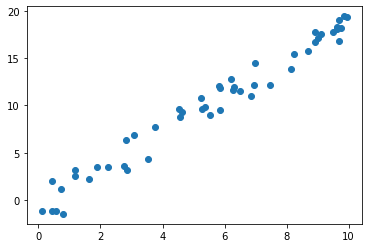

In [61]:
x =10*rng.rand(50)
y=2*x-1+rng.randn(50)
plt.scatter(x,y)

In [62]:
from sklearn.linear_model import LinearRegression

In [63]:
model=LinearRegression(fit_intercept=True)
model

LinearRegression()

In [64]:
x = x[:, np.newaxis]

x.shape

(50, 1)

In [65]:
model.fit(x,y)

LinearRegression()

In [66]:
model.coef_

array([1.97097559])

In [67]:
model.intercept_

-0.750732282984286

In [68]:
x_fit=np.linspace(-1,11)
x_fit=x_fit[:,np.newaxis]
y_fit=model.predict(x_fit)

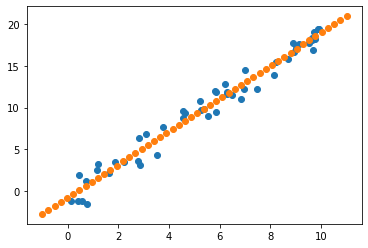

In [69]:
plt.scatter(x,y)
plt.scatter(x_fit,y_fit)

In [70]:
from sklearn.model_selection import train_test_split

In [72]:
x_egitim,x_test,y_egitim,y_test=train_test_split(x_iris,y_iris,random_state=1)

In [73]:
from sklearn.naive_bayes import GaussianNB

In [75]:
model=GaussianNB()

In [76]:
model.fit(x_egitim, y_egitim)

GaussianNB()

In [77]:
y_model=model.predict(x_test)

In [78]:
from sklearn.metrics import accuracy_score

In [79]:
accuracy_score(y_test, y_model)

0.9736842105263158

In [80]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [81]:
 from sklearn.decomposition import PCA

In [82]:
model=PCA(n_components=2)

In [83]:
model.fit(x_iris)

PCA(n_components=2)

In [84]:
x_2D=model.transform(x_iris)

In [85]:
iris['PCA1']=x_2D[:,0]
iris['PCA2']=x_2D[:,1]

In [86]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,PCA1,PCA2
0,5.1,3.5,1.4,0.2,setosa,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,setosa,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,setosa,-2.888991,-0.144949
3,4.6,3.1,1.5,0.2,setosa,-2.745343,-0.318299
4,5.0,3.6,1.4,0.2,setosa,-2.728717,0.326755


In [89]:
import seaborn as sns

C:\Users\Casper\Anaconda3\newanaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


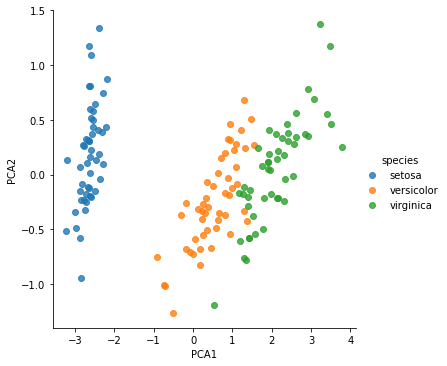

In [90]:
sns.lmplot('PCA1','PCA2',hue='species',data=iris,fit_reg=False)

In [91]:
from sklearn.mixture import GaussianMixture

In [95]:
model=GaussianMixture(n_components=3,covariance_type='full')

In [96]:
model.fit(x_iris)

GaussianMixture(n_components=3)

In [98]:
y_gmm=model.predict(x_iris)

In [99]:
iris['kumeleme']=y_gmm

In [101]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,PCA1,PCA2,kumeleme
0,5.1,3.5,1.4,0.2,setosa,-2.684126,0.319397,0
1,4.9,3.0,1.4,0.2,setosa,-2.714142,-0.177001,0
2,4.7,3.2,1.3,0.2,setosa,-2.888991,-0.144949,0
3,4.6,3.1,1.5,0.2,setosa,-2.745343,-0.318299,0
4,5.0,3.6,1.4,0.2,setosa,-2.728717,0.326755,0


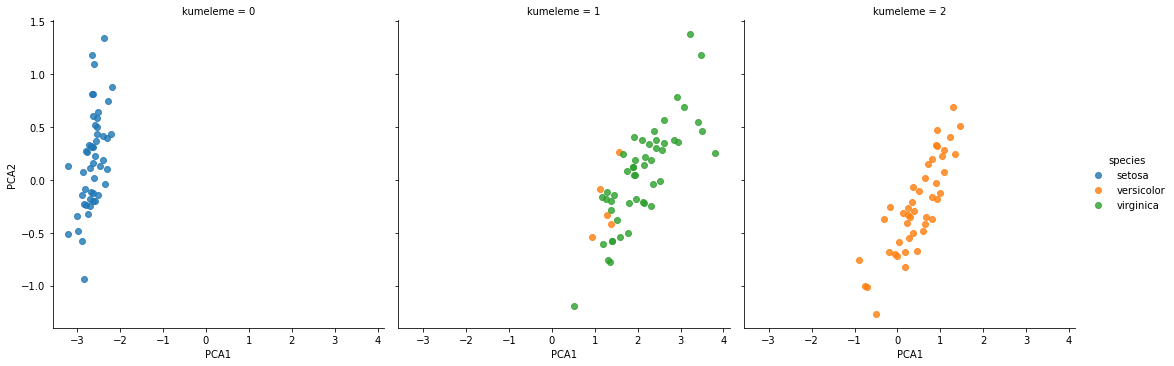

In [103]:
sns.lmplot('PCA1','PCA2',hue='species',data=iris,col='kumeleme',fit_reg=False)

In [106]:
from sklearn.datasets import load_digits

In [107]:
digits=load_digits()

In [109]:
digits.images.shape

(1797, 8, 8)

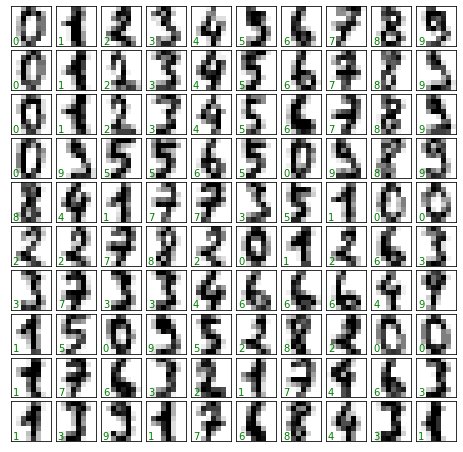

In [114]:
fig, axes=plt.subplots(10,10,figsize=(8,8),subplot_kw={'xticks':[],'yticks':[]},gridspec_kw=dict(hspace=0.1,wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),transform=ax.transAxes, color='green')

In [116]:
X=digits.data
y=digits.target
print(X.shape)
print(y.shape)

(1797, 64)
(1797,)


In [122]:
  from sklearn.manifold import Isomap

In [123]:
iso=Isomap(n_components=2)

In [132]:
iso.fit(X)

Isomap()

In [133]:
data2=iso.transform(X)
data2.shape

(1797, 2)

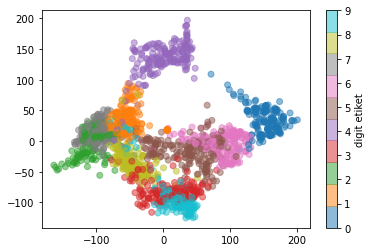

In [138]:
plt.scatter(data2[:,0],data2[:,1],c=digits.target, alpha=0.5, cmap=plt.cm.get_cmap('tab10',10))
plt.colorbar(label='digit etiket',ticks=range(10))

In [142]:
from sklearn.model_selection import train_test_split
X_egitim,X_test,y_egitim,y_test=train_test_split(X,y,random_state=0)

In [143]:
from sklearn.naive_bayes import GaussianNB

In [144]:
model=GaussianNB()

In [145]:
model.fit(X_egitim,y_egitim)

GaussianNB()

In [147]:
y_model=model.predict(X_test)

In [148]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_model)

0.8333333333333334

In [151]:
from sklearn.metrics import confusion_matrix
mat=confusion_matrix(y_test,y_model)

Text(91.68, 0.5, 'Gerçek Değer')

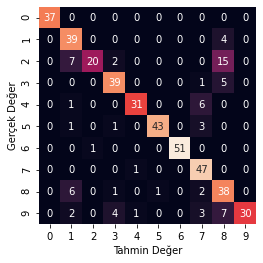

In [152]:
sns.heatmap(mat,square=True, annot=True,cbar=False)
plt.xlabel('Tahmin Değer')
plt.ylabel('Gerçek Değer')